<a href="https://colab.research.google.com/github/nvinay1303/stock_price_prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/KOTAK_BANK_DAILY_2001-2024.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02/07/01,2.4025,2.4750,2.4000,2.4025,2.223229,110800.0
1,03/07/01,2.4750,2.4750,2.3750,2.4000,2.220917,77520.0
2,04/07/01,2.4250,2.4500,2.3875,2.4200,2.239424,49360.0
3,05/07/01,2.4500,2.4725,2.4000,2.4150,2.234797,62700.0
4,06/07/01,2.4250,2.4250,2.3500,2.4000,2.220917,117800.0


In [ ]:
# We use the Close column for carrying out the stock price prediction for Kotak Bank
df1 = df['Close']

In [ ]:
#Checking for Null rows
df1[df1.isnull() == True]

465    NaN
2173   NaN
2651   NaN
2690   NaN
2820   NaN
2862   NaN
3199   NaN
3428   NaN
Name: Close, dtype: float64

In [ ]:
df1.dropna(axis=0,inplace=True)

In [ ]:
df1=df1[5300:5670]

Text(0.5, 0, 'Date')

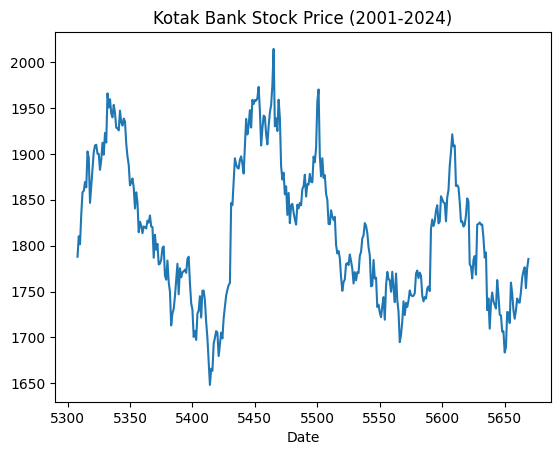

In [ ]:
plt.plot(df1)
plt.title("Kotak Bank Stock Price (2001-2024)")
plt.xlabel('Date')

In [ ]:
# LSTM is sensitive to the scale of data. So we use min-max scaler to normalize the data between 0 and 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
# Split the dataset into train and test sets

train_size = int(0.65*len(df1))
test_size = len(df1)-train_size
train_data,test_data = df1[0:train_size,:],df1[train_size:len(df),:]

In [ ]:
train_data,test_data

(array([[0.38145325],
        [0.44236537],
        [0.4186015 ],
        [0.50737507],
        [0.57334072],
        [0.57757434],
        [0.60393333],
        [0.58809086],
        [0.69489222],
        [0.67618155],
        [0.54179183],
        [0.59205139],
        [0.64463266],
        [0.69297997],
        [0.71278331],
        [0.71483193],
        [0.68806348],
        [0.68751698],
        [0.64012563],
        [0.66962589],
        [0.72084141],
        [0.68519528],
        [0.7499319 ],
        [0.72152429],
        [0.86765923],
        [0.82573086],
        [0.85031431],
        [0.80811252],
        [0.79623059],
        [0.83337885],
        [0.81016115],
        [0.7652282 ],
        [0.76454532],
        [0.7574435 ],
        [0.81617063],
        [0.78134408],
        [0.77178385],
        [0.79267951],
        [0.78393887],
        [0.71892917],
        [0.67945921],
        [0.65501247],
        [0.59410001],
        [0.60161162],
        [0.61444951],
        [0

In [ ]:
train_data.shape,test_data.shape

((235, 1), (127, 1))

In [ ]:
# Create the features for the LSTM model
def create_lstm_dataset(dataset, timestep):
  dataX, dataY = [],[]
  for i in range(len(dataset)-timestep-1):
    a = train_data[i:(i+timestep),0]
    dataX.append(a)
    dataY.append(dataset[i+timestep,0])
  return np.array(dataX), np.array(dataY)

In [ ]:
#Timestep initiation and creating training and testing data by calling the function
timestep = 100
X_train, Y_train = create_lstm_dataset(train_data,timestep)
X_test, Y_test = create_lstm_dataset(test_data,timestep)
X_test

array([[0.38145325, 0.44236537, 0.4186015 , ..., 0.22125104, 0.26399899,
        0.20062812],
       [0.44236537, 0.4186015 , 0.50737507, ..., 0.26399899, 0.20062812,
        0.28066104],
       [0.4186015 , 0.50737507, 0.57334072, ..., 0.20062812, 0.28066104,
        0.28066104],
       ...,
       [0.72152429, 0.86765923, 0.82573086, ..., 0.28311945, 0.29732309,
        0.30333258],
       [0.86765923, 0.82573086, 0.85031431, ..., 0.29732309, 0.30333258,
        0.54151875],
       [0.82573086, 0.85031431, 0.80811252, ..., 0.30333258, 0.54151875,
        0.53482672]])

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((134, 100), (134,), (26, 100), (26,))

In [ ]:
# Reshape X_train and Y_train for the LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [ ]:
X_train.shape[1]

100

In [ ]:
#Create stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,Y_train, validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
3/3 [==============================] - 10s 804ms/step - loss: 0.3039 - val_loss: 0.0198
Epoch 2/100
3/3 [==============================] - 0s 42ms/step - loss: 0.1149 - val_loss: 0.0128
Epoch 3/100
3/3 [==============================] - 0s 49ms/step - loss: 0.0442 - val_loss: 0.0445
Epoch 4/100
3/3 [==============================] - 0s 48ms/step - loss: 0.0556 - val_loss: 0.0169
Epoch 5/100
3/3 [==============================] - 0s 51ms/step - loss: 0.0293 - val_loss: 0.0088
Epoch 6/100
3/3 [==============================] - 0s 51ms/step - loss: 0.0316 - val_loss: 0.0077
Epoch 7/100
3/3 [==============================] - 0s 45ms/step - loss: 0.0315 - val_loss: 0.0107
Epoch 8/100
3/3 [==============================] - 0s 51ms/step - loss: 0.0256 - val_loss: 0.0181
Epoch 9/100
3/3 [==============================] - 0s 47ms/step - loss: 0.0265 - val_loss: 0.0228
Epoch 10/100
3/3 [==============================] - 0s 43ms/step - loss: 0.0281 - val_loss: 0.0166
Epoch 11/100
3/3 

In [ ]:
#Check the predictions for the train and test data
#train_predict=model.predict(X_train)
#test_predict=model.predict(X_test)

In [ ]:
y_pred= model.predict(X_test)


1/1 [==============================] - 1s 945ms/step


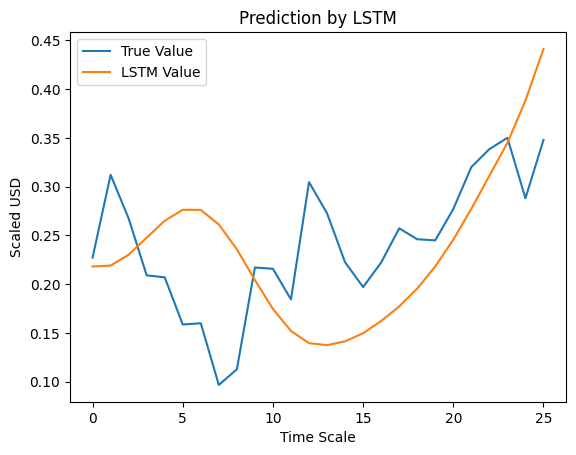

In [ ]:
plt.plot(Y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()